# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [33]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

## Load Dataset

In [34]:
df = pd.read_csv("news_data.csv")

In [35]:
df.sample(10)

,id,kode_provinsi,nama_provinsi,judul_berita,klasifikasi_utama,klasifikasi_menyinggung,status_berita,bulan,jumlah_aduan,satuan,tahun
221,222,32,JAWA BARAT,KFC SEDIAKAN HADIAH BUCKET AYAM DI PERINGATAN HARI PEREMPUAN INTERNASIONAL 2021,KRIMINALITAS,KRIMINALITAS,DISINFORMASI (HOAKS),MARET,3,ADUAN,2021
331,332,32,JAWA BARAT,VIDEO : 500 TON PISANG DARI SOMALIA TERKONTAMINASI CACING HELICOBACTER,PANGAN,PANGAN,DISINFORMASI (HOAKS),NOVEMBER,3,ADUAN,2021
84,85,32,JAWA BARAT,TAK PAKAI MASKER DAN SARUNG TANGAN : JENIS PELANGGARAN YANG TERTERA DALAM LEMBAR SURAT TILANG,0,0,MISINFORMASI (HOAKS),JUNI,5,ADUAN,2020
319,320,32,JAWA BARAT,"GELAR ICF CHAMPIONSHIP 2021, JALAN MENUJU KOTA GARUT PADA 26 OKTOBER 2021 DITUTUP",TRANSPORTASI,ENTERTAIMENT,BENAR,OKTOBER,2,ADUAN,2021
245,246,32,JAWA BARAT,GURU SUKABUMI LUMPUH USAI VAKSIN COVID-19 DOSIS 2,KESEHATAN,KESEHATAN,BENAR,MEI,5,ADUAN,2021
225,226,32,JAWA BARAT,JUAL MINUMAN KERAS HUKUMNYA BOLEH UNTUK MEMBANTU KAS NEGARA,HUKUM DAN REGULASI,HUKUM DAN REGULASI,DISINFORMASI (HOAKS),MARET,2,ADUAN,2021
83,84,32,JAWA BARAT,"BOGOR SAAT INI JADI LAUTAN MERAH MEMBARA, PENYEBARAN VIRUSNYA BANYAK SEKALI",0,0,BENAR,JUNI,5,ADUAN,2020
222,223,32,JAWA BARAT,"MUAL HINGGA BENGKAK, WARTAWAN JAWA POS TV DILARIKAN KE IGD PASCA DIVAKSIN SINOVAC",KESEHATAN,KESEHATAN,BENAR,MARET,3,ADUAN,2021
109,110,32,JAWA BARAT,"INFO RAZIA MASKER BESAR-BESARAN DI JABODETABEK LIBATKAN PEMDA, KEJAKSAAN DAN PM",HUKUM DAN REGULASI,HUKUM DAN REGULASI,DISINFORMASI (HOAKS),AGUSTUS,9,ADUAN,2020
110,111,32,JAWA BARAT,DAFTAR KARTU INDONESIA PINTAR SAMPAI DENGAN TANGGAL 25 AGUSTUS,HUKUM DAN REGULASI,PENDIDIKAN,DISINFORMASI (HOAKS),AGUSTUS,8,ADUAN,2020


The columns that we will be focus on for this project is only "judul berita" (news title) and "status berita" (the label of the news). But let's check for overview of the entire dataset first.

In [36]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 361
Number of columns 11


In [37]:
# Dataset overview
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage (%),Duplicated Values,Unique Values,5 Unique Sample
0,id,int64,0,0.0,0,361,"[1, 2, 3, 4, 5]"
1,kode_provinsi,int64,0,0.0,0,1,[32]
2,nama_provinsi,object,0,0.0,0,1,[JAWA BARAT]
3,judul_berita,object,0,0.0,0,328,"[RS HASAN SADIKIN BANDUNG ISOLASI PASIEN TERDUGA VIRUS CORONA, SELEBARAN BERLOGO POLDA METRO JAYA : WASPADA PENCULIKAN ANAK 12 TAHUN, PELAKU MENYAMAR SEBAGAI BUMIL, ARTI HURUF ARAB PADA BUKU IQRA 1, CORONA DICIPTAKAN PADA ZAMAN PENUH KEBOHONGAN, CIPANAS (PUNCAK) BARU SAJA DILANDA BANJIR BANDANG, ALIRAN AIRNYA BISA MASUK JKT BESOK PAGI, DITOLAK DI BERBAGAI NEGARA, RATUSAN TURIS CHINA DISAMBUT DI INONESIA]"
4,klasifikasi_utama,object,0,0.0,0,19,"[0, KRIMINALITAS, EKONOMI, HUKUM DAN REGULASI, PENDIDIKAN]"
5,klasifikasi_menyinggung,object,0,0.0,0,20,"[0, KRIMINALITAS, EKONOMI, POLITIK, HUKUM DAN REGULASI]"
6,status_berita,object,0,0.0,0,4,"[BENAR, DISINFORMASI (HOAKS), MISINFORMASI (HOAKS), 0]"
7,bulan,object,0,0.0,0,12,"[JANUARI, FEBRUARI, MARET, APRIL, MEI]"
8,jumlah_aduan,int64,0,0.0,0,39,"[19, 6, 3, 2, 22]"
9,satuan,object,0,0.0,0,1,[ADUAN]


In [38]:
# Focus the dataframe for sentiment analysis
df = df[["judul_berita", "status_berita"]]
df

,judul_berita,status_berita
0,RS HASAN SADIKIN BANDUNG ISOLASI PASIEN TERDUGA VIRUS CORONA,BENAR
1,"SELEBARAN BERLOGO POLDA METRO JAYA : WASPADA PENCULIKAN ANAK 12 TAHUN, PELAKU MENYAMAR SEBAGAI BUMIL",DISINFORMASI (HOAKS)
2,"ARTI HURUF ARAB PADA BUKU IQRA 1, CORONA DICIPTAKAN PADA ZAMAN PENUH KEBOHONGAN",DISINFORMASI (HOAKS)
3,"CIPANAS (PUNCAK) BARU SAJA DILANDA BANJIR BANDANG, ALIRAN AIRNYA BISA MASUK JKT BESOK PAGI",DISINFORMASI (HOAKS)
4,"DITOLAK DI BERBAGAI NEGARA, RATUSAN TURIS CHINA DISAMBUT DI INONESIA",BENAR
...,...,...
356,AKUN WHATSAPP MENGATASNAMAKAN KAPOLDA JAWA BARAT AHMAD DOFIRI,DISINFORMASI (HOAKS)
357,BEJAT! GURU NGAJI DI DEPOK CABULI 10 ANAK MURIDNYA,BENAR
358,BENARKAH JANTUNG MANUSIA BERHENTI BERDETAK SAAT BERSIN?,DISINFORMASI (HOAKS)
359,BENARKAH KONSUMSI SAYUR PAKIS MENGAKIBATKAN KANKER LAMBUNG,DISINFORMASI (HOAKS)


# **EXPLORATORY DATA ANALYSIS (EDA)**

In [39]:
df.describe()

,judul_berita,status_berita
count,361,361
unique,328,4
top,DAFTAR PRAKERJA MELALUI SITUS HTTPS://PRAKERJA.VIP,DISINFORMASI (HOAKS)
freq,4,236


We can see that, if we select only the title and the label, some of the data actually duplicated, so we will need to erase them first.

In [40]:
# Checking the amount of label for each
df['status_berita'].value_counts()

status_berita
DISINFORMASI (HOAKS)    236
BENAR                    85
MISINFORMASI (HOAKS)     36
0                         4
Name: count, dtype: int64

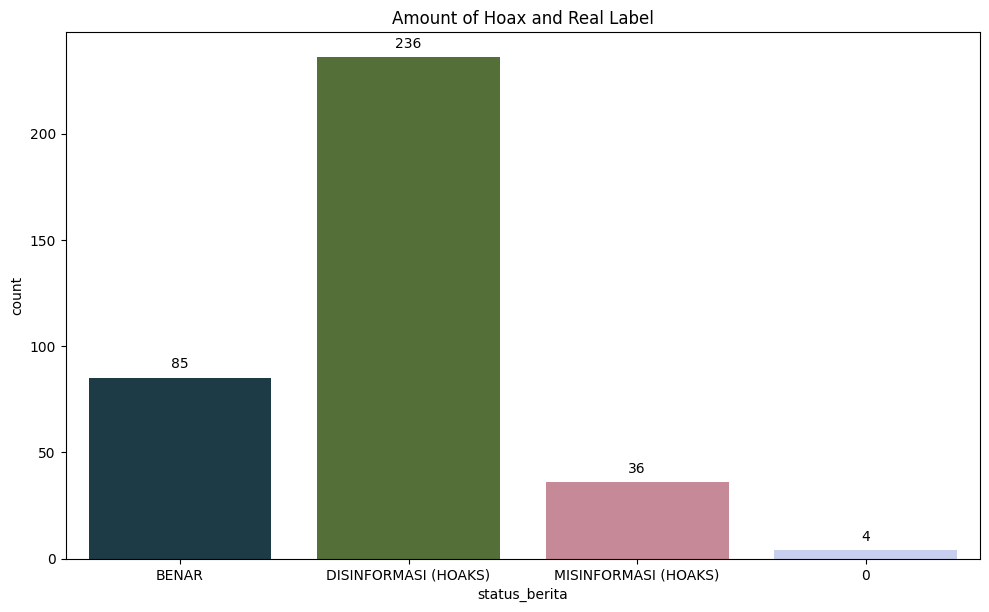

In [41]:
# (additional) If wanted to plot them
plt.figure(figsize=(10, 6))
# ax = df["status_berita"].value_counts().plot(kind="bar")
ax = sns.countplot(data = df, x="status_berita", palette = "cubehelix")

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(
        text=f'{int(p.get_height())}',             # The text to display (the height of the bar)
        xy=(p.get_x() + p.get_width() / 2., p.get_height()),  # The position to place the text (centered on the bar)
        ha='center',                               # Horizontal alignment of the text
        va='center',                               # Vertical alignment of the text
        xytext=(0, 10),                            # Offset of the text from the bar (in points)
        textcoords='offset points'                 # Specifies that `xytext` is an offset in points
    )

plt.tight_layout()
plt.title("Amount of Hoax and Real Label")
plt.show()

# **DATA PREPROCESSING**

### Dropping Duplicated Data

In [42]:
# Handle duplicate data
print(f"Amount of duplicated data Before : {df.duplicated(subset="judul_berita").sum()}")

df = df.drop_duplicates(subset="judul_berita")
print(f"Amount of duplicated data After : {df.duplicated(subset="judul_berita").sum()}")

Amount of duplicated data Before : 33
Amount of duplicated data After : 0


### Cleaning Null Data & Similar Hoax Name

We will need to fix the label here with several steps :
- Delete the 0 label
- Replace the MISINFORMASI (HOAKS) with DISINFORMASI (HOAKS) since they are the same

In [43]:
# Handling inconsistent value
df = df[df["status_berita"] != "0"]
df["status_berita"] = df["status_berita"].replace("MISINFORMASI (HOAKS)", "DISINFORMASI (HOAKS)")

### Counting The Length of Each News's Title

In [44]:
df['title_length'] = df['judul_berita'].apply(len)

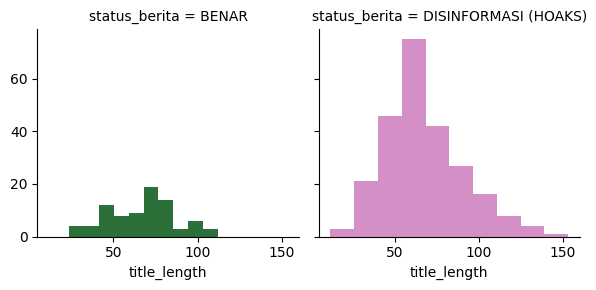

In [45]:
g = sns.FacetGrid(df, col='status_berita', hue='status_berita', palette='cubehelix')
g.map(plt.hist, 'title_length')

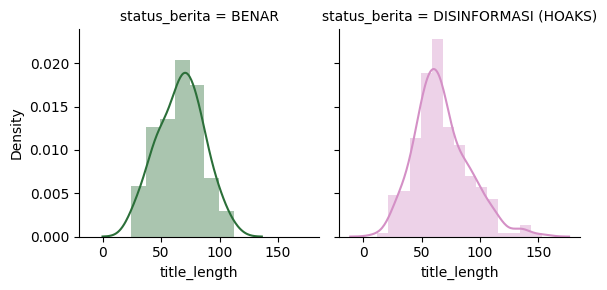

In [46]:
g = sns.FacetGrid(df, col='status_berita', hue='status_berita', palette='cubehelix')
g.map(sns.distplot, 'title_length')

In terms of density the title lenght of the label TRUE and HOAX are similar, but we can see that they have imbalanced frequencies which may result in one class being favored by the algorithm later. So we need to do some balancing process.

### Outlier Handling with IQR Method

<Axes: xlabel='status_berita', ylabel='title_length'>

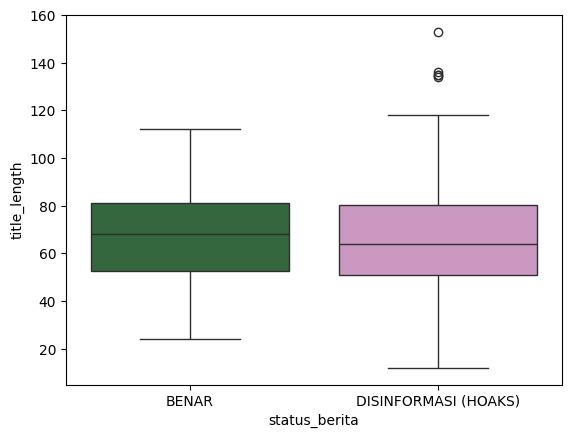

In [47]:
sns.boxplot(data=df, x="status_berita", y="title_length", palette="cubehelix")

In [54]:
# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

df_preprocessed = df[filtered_entries]

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':df.select_dtypes(include=['number']).columns,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

display(check_outliers)
display(df_preprocessed)

df = df_preprocessed

Amount of Rows: 325
Amount of Rows: 325
Amount of Outlier Rows : 5
Amount of Non-Outlier Rows : 320
Percentage of Outliers : 1.54



,Column Name,Outlier Exist,Lower Limit,Upper Limit,Outlier Data,Non-Outlier Data,Percentage of Outlier
0,title_length,True,6.0,126.0,5,320,1.538462


,judul_berita,status_berita,title_length
0,RS HASAN SADIKIN BANDUNG ISOLASI PASIEN TERDUGA VIRUS CORONA,BENAR,60
1,"SELEBARAN BERLOGO POLDA METRO JAYA : WASPADA PENCULIKAN ANAK 12 TAHUN, PELAKU MENYAMAR SEBAGAI BUMIL",DISINFORMASI (HOAKS),100
2,"ARTI HURUF ARAB PADA BUKU IQRA 1, CORONA DICIPTAKAN PADA ZAMAN PENUH KEBOHONGAN",DISINFORMASI (HOAKS),79
3,"CIPANAS (PUNCAK) BARU SAJA DILANDA BANJIR BANDANG, ALIRAN AIRNYA BISA MASUK JKT BESOK PAGI",DISINFORMASI (HOAKS),90
4,"DITOLAK DI BERBAGAI NEGARA, RATUSAN TURIS CHINA DISAMBUT DI INONESIA",BENAR,68
...,...,...,...
355,AKUN PT PETROKIMIA GRESIK,DISINFORMASI (HOAKS),25
357,BEJAT! GURU NGAJI DI DEPOK CABULI 10 ANAK MURIDNYA,BENAR,50
358,BENARKAH JANTUNG MANUSIA BERHENTI BERDETAK SAAT BERSIN?,DISINFORMASI (HOAKS),55
359,BENARKAH KONSUMSI SAYUR PAKIS MENGAKIBATKAN KANKER LAMBUNG,DISINFORMASI (HOAKS),58


<Axes: xlabel='status_berita', ylabel='title_length'>

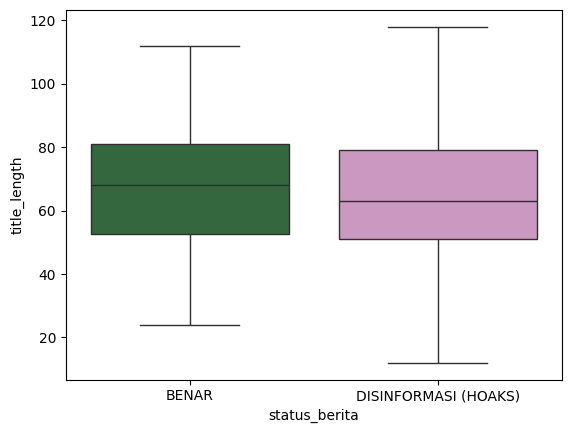

In [55]:
sns.boxplot(data=df, x="status_berita", y="title_length", palette="cubehelix")

### Balancing Each Class using Resample

In [56]:
df["status_berita"].value_counts()

status_berita
DISINFORMASI (HOAKS)    238
BENAR                    82
Name: count, dtype: int64

In [63]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df['status_berita'] == 'DISINFORMASI (HOAKS)']
df_minority = df[df['status_berita'] == 'BENAR']

# Oversample the minority class to match the majority class count
df_minority_oversampled = resample(df_minority, 
                                   replace=True,       # Sample with replacement
                                   n_samples=len(df_majority),  # Match the number of majority class
                                   random_state=42)    # Reproducible results

# Combine the oversampled minority class with the majority class
df = pd.concat([df_majority, df_minority_oversampled])

# Check the new class distribution
print(df['status_berita'].value_counts())


status_berita
DISINFORMASI (HOAKS)    238
BENAR                   238
Name: count, dtype: int64


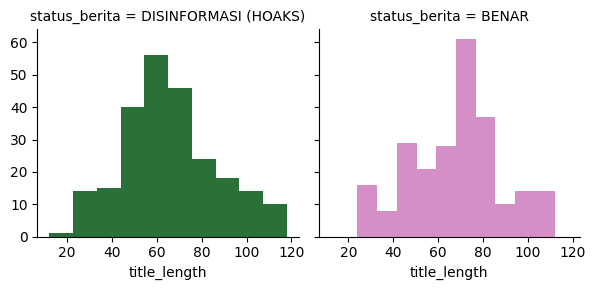

In [64]:
g = sns.FacetGrid(df, col='status_berita', hue='status_berita', palette='cubehelix')
g.map(plt.hist, 'title_length')

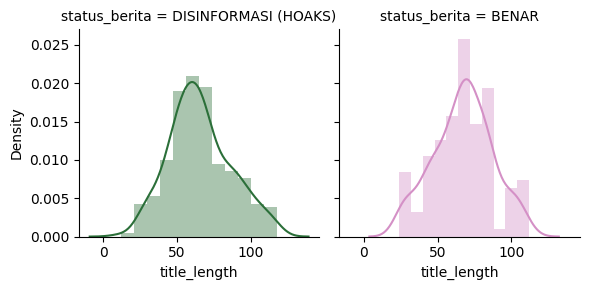

In [65]:
g = sns.FacetGrid(df, col='status_berita', hue='status_berita', palette='cubehelix')
g.map(sns.distplot, 'title_length')

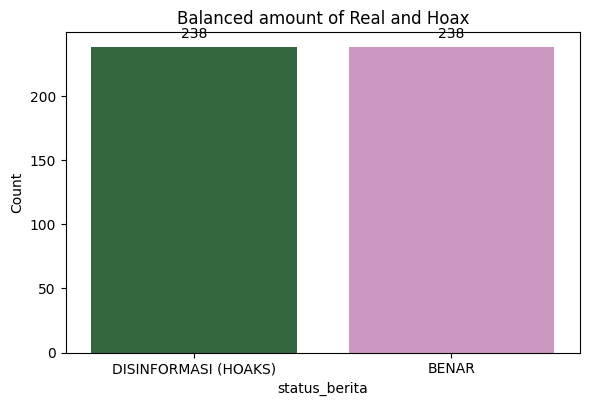

In [76]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(data=df, x="status_berita", palette="cubehelix")
# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(
        text=f'{int(p.get_height())}',             # The text to display (the height of the bar)
        xy=(p.get_x() + p.get_width() / 2., p.get_height()),  # The position to place the text (centered on the bar)
        ha='center',                               # Horizontal alignment of the text
        va='center',                               # Vertical alignment of the text
        xytext=(0, 10),                            # Offset of the text from the bar (in points)
        textcoords='offset points'                 # Specifies that `xytext` is an offset in points
    )
plt.tight_layout()
plt.title("Balanced amount of Real and Hoax")
plt.ylabel("Count")
plt.show()